In [2]:
#import library
import pandas as pd
import numpy as np
import math
import utils
import statsmodels.api as sm

c:\Users\waibo\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:205: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df_data_set = pd.read_csv('Data/Realized Vol.csv')

df_data_set.set_index('Date', inplace=True)

df_data_set.head(5)

,Realized Volatility
Date,
2005-01-04,0.645193
2005-01-05,1.293114
2005-01-06,0.497776
2005-01-07,1.139912
2005-01-10,0.541123


In [4]:
series = np.array(df_data_set['Realized Volatility'])

Implementing HAR-RV model # by Corsi (2009)

The HAR-RV model is a regression-based model that uses lagged realized volatility
  as predictor variables to forecast the volatility of a financial asset. 
 The model assumes that the volatility of an asset depends on its own past volatility as 
 well as the past volatility of related assets and the overall market volatility. 

 RV_t = α_0 + α_1 RV_{t-1} + α_2 RV_{t-5} + α_3 RV_{t-22}  + ε_t



In [5]:
#So Now I am going to preprocess the data
#Calculate the lagged volatility
lag_1 = np.array(series[21:][:-1])
lag_5 = np.array([np.mean(series[i-5:i]) for i in range(22,len(series))])
lag_22 = np.array([np.mean(series[i-22:i]) for i in range(22,len(series))])

#the first 22 column of series has been dropped because they have no data for lag_22
series = series[22:]

In [6]:
#Create a dataframe to store
Y = pd.Series(series)
X = pd.DataFrame()
X['Constant'] = np.array([1 for i in range(len(lag_1))])
X['RV_lag_1'] = lag_1
X['RV_lag_5'] = lag_5
X['RV_lag_22'] = lag_22

In [7]:
X

,Constant,RV_lag_1,RV_lag_5,RV_lag_22
0,1,3.041918,1.114210,0.943433
1,1,3.711811,1.766252,1.082825
2,1,1.455927,1.968796,1.090226
3,1,1.203328,2.064023,1.122296
4,1,0.737522,2.030101,1.104006
...,...,...,...,...
4383,1,0.552709,0.612850,0.325947
4384,1,0.223816,0.630465,0.316384
4385,1,0.343995,0.456112,0.324377
4386,1,0.294861,0.378761,0.331398


In [8]:
Y

0       3.711811
1       1.455927
2       1.203328
3       0.737522
4       0.478975
          ...   
4383    0.223816
4384    0.343995
4385    0.294861
4386    0.335694
4387    0.256646
Length: 4388, dtype: float64

In [9]:
#Split the data into train set and test set
TEST_LEN = 439
Y_train, Y_test = Y[:-TEST_LEN], Y[-TEST_LEN:]
X_train, X_test = X[:-TEST_LEN], X[-TEST_LEN:]

In [10]:
X.shape, X_train.shape, Y_test.shape

((4388, 4), (3949, 4), (439,))

In [11]:
# Start Linear regression
mod = sm.OLS(Y_train,X_train)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     1361.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        00:47:59   Log-Likelihood:                -8185.0
No. Observations:                3949   AIC:                         1.638e+04
Df Residuals:                    3945   BIC:                         1.640e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant       0.1583      0.041      3.884      0.000       0.078       0.238
RV_lag_1       0.3492      0.019     18.655      0.000       0.312       0.386
RV_lag_5       0.3067      0.030     10.140      0.000       0.247       0.366
RV_lag_22      0.2489      0.028      8.814      0.000       0.194       0.304
==============================================================================
Omnibus:                     4287.082   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           548722.617
Skew:                           5.285   Prob(JB):                         0.00
Kurtosis:                      59.773   Cond. No.                         6.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
y_pred = res.predict(X_test)

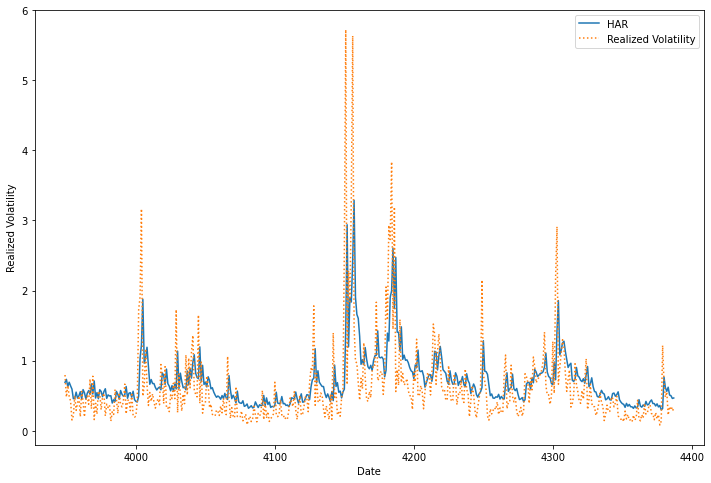

In [13]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(y_pred, label='HAR')
plt.plot(Y_test, label='Realized Volatility',linestyle=':')
plt.xlabel('Date')
plt.ylabel('Realized Volatility')
plt.legend()
plt.show()

In [14]:
utils.Predictions_Error(Predictions_val=y_pred,Actual_val=Y_test)

MAE =  0.3243138540200378
MSE =  0.26629932612928137
RMSE =  0.516041980975658
R_2 =  0.2826788371037261
RMSPE =  0.9952087449591868
MSLE =  0.05206237212822267


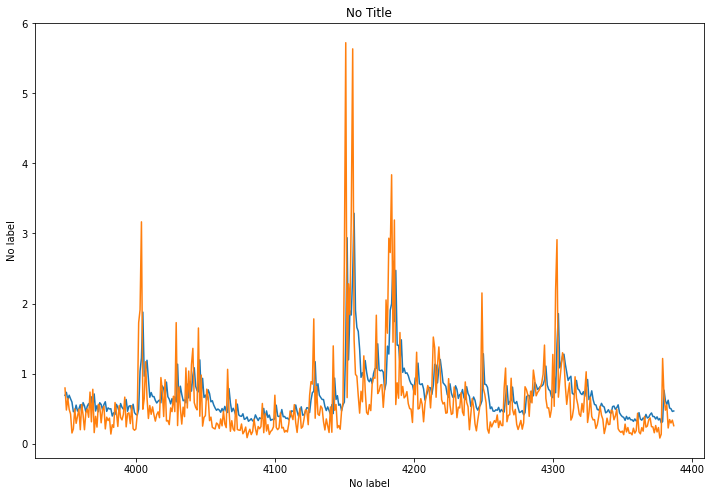

In [21]:
utils.plot_figure(y_pred,Y_test)